# IMPORTING THE LIBRARIES

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import calendar


# READ THE DATASET

In [195]:

df5=pd.read_csv('ASSET_METADATA.csv')

df6=pd.read_csv('Schedule Data.csv')

In [196]:
df5

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,202141,2006.0,R,"Action, Comedy, Thriller",6.4,52.0,"3,486",0,0,2,...,44.0,5.4,88.0,39.0,49.0,57.0,3.1,22762.0,rotten,"$61,800"
5397,200915,2012.0,R,"Documentary, Music",6.9,53.0,774,0,0,1,...,62.0,5.9,42.0,26.0,16.0,74.0,3.9,745.0,fresh,"$59,600"
5398,188021,2010.0,NaN,Drama,5.6,63.0,183,0,0,1,...,83.0,6.1,12.0,10.0,2.0,72.0,3.5,267.0,fresh,"$2,800"
5399,197147,2010.0,NaN,Drama,6.5,69.0,443,0,0,4,...,73.0,6.1,15.0,11.0,4.0,54.0,3.3,125.0,fresh,"$31,900"


In [197]:
df6

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0
...,...,...,...,...,...,...,...,...,...,...
2512,185554,9/27/2014 1:30,9/27/2014 4:00,0,1,0,150,Late Night,23021,336985.0
2513,171859,1/29/2014 9:30,1/29/2014 12:00,0,1,0,150,Breakfast,50155,184164.0
2514,171986,8/18/2014 15:30,8/18/2014 18:00,0,1,0,150,Daytime,86038,461515.0
2515,185461,9/12/2013 10:00,9/12/2013 12:15,0,0,1,135,Daytime,43436,206781.0


In [198]:
df6.groupby(['ASSET_ID'])['AIRING_REVENUE'].sum().reset_index()

,ASSET_ID,AIRING_REVENUE
0,171646,178543
1,171652,713100
2,171685,159644
3,171709,128540
4,171731,29443
...,...,...
407,199914,107476
408,199915,507530
409,200321,123589
410,200437,89498


# JOINING,CLEANING AND FEATURE ENGINEERING(EXPLORATORY ANALYSIS)

In [199]:
df81=df6[:]

In [200]:
df81

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0
...,...,...,...,...,...,...,...,...,...,...
2512,185554,9/27/2014 1:30,9/27/2014 4:00,0,1,0,150,Late Night,23021,336985.0
2513,171859,1/29/2014 9:30,1/29/2014 12:00,0,1,0,150,Breakfast,50155,184164.0
2514,171986,8/18/2014 15:30,8/18/2014 18:00,0,1,0,150,Daytime,86038,461515.0
2515,185461,9/12/2013 10:00,9/12/2013 12:15,0,0,1,135,Daytime,43436,206781.0


In [201]:
df6.drop_duplicates(subset='ASSET_ID',keep="first", inplace=True)

In [202]:
df6

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0
...,...,...,...,...,...,...,...,...,...,...
2373,173041,8/9/2013 3:00,8/9/2013 5:30,0,1,0,150,Late Night,19340,228982.0
2399,172070,3/8/2014 2:30,3/8/2014 4:30,0,1,0,120,Late Night,17534,215983.0
2438,172381,1/10/2014 9:00,1/10/2014 11:00,0,1,0,120,Breakfast,41786,165014.0
2446,173508,4/17/2014 9:00,4/17/2014 11:00,0,0,1,120,Breakfast,40353,173066.0


In [203]:
df8

,ASSET_ID,AIRING_REVENUE,Oscar-Wins,BOX_OFFICE_EARNINGS
0,204750,95211.631068,0,"$94,700,000"
1,172902,95211.631068,0,"$18,900,000"
2,198131,95211.631068,0,"$39,700,000"
3,195393,95211.631068,0,"$124,700,000"
4,185444,11579.000000,0,"$30,100,000"
...,...,...,...,...
5396,202141,95211.631068,0,"$61,800"
5397,200915,95211.631068,0,"$59,600"
5398,188021,95211.631068,0,"$2,800"
5399,197147,95211.631068,0,"$31,900"


In [204]:
df5.columns

Index(['ASSET_ID', 'RELEASE_YEAR', 'MPAA_RATING', 'GENRE', 'IMDB_RATING',
       'IMDB_RANKING', 'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_METER', 'TOMATO_RATING',
       'TOMATO_REVIEWS', 'TOMATO_FRESH', 'TOMATO_ROTTEN', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'TOMATO_IMAGE',
       'BOX_OFFICE_EARNINGS'],
      dtype='object')

In [205]:
df6.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING'],
      dtype='object')

In [206]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASSET_ID             5401 non-null   int64  
 1   RELEASE_YEAR         5400 non-null   float64
 2   MPAA_RATING          4335 non-null   object 
 3   GENRE                5374 non-null   object 
 4   IMDB_RATING          5401 non-null   float64
 5   IMDB_RANKING         2467 non-null   float64
 6   IMDB_VOTES           5400 non-null   object 
 7   Oscar-Nomination     5401 non-null   int64  
 8   Oscar-Wins           5401 non-null   int64  
 9   Other - Nominations  5401 non-null   int64  
 10  Other - Wins         5401 non-null   int64  
 11  TOMATO_METER         3902 non-null   float64
 12  TOMATO_RATING        3902 non-null   float64
 13  TOMATO_REVIEWS       3915 non-null   float64
 14  TOMATO_FRESH         3915 non-null   float64
 15  TOMATO_ROTTEN        3915 non-null   f

In [207]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 2480
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ASSET_ID                412 non-null    int64  
 1   AIRING_START_DATE_TIME  412 non-null    object 
 2   AIRING_END_DATE_TIME    412 non-null    object 
 3   PREMIER_AIRING          412 non-null    int64  
 4   EXHIBITION_AIRING       412 non-null    int64  
 5   FREE_AIRING             412 non-null    int64  
 6   SCHEDULED_RUNTIME       412 non-null    int64  
 7   DAY_PART                412 non-null    object 
 8   AIRING_REVENUE          412 non-null    int64  
 9   C3_RATING               411 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 35.4+ KB


In [208]:
df5.shape

(5401, 21)

In [209]:
df6.shape

(412, 10)

In [210]:
df7=pd.merge(df5,df6,left_on='ASSET_ID',right_on='ASSET_ID',how='outer',indicator=True)

In [211]:
df7

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,_merge
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,11/19/2014 3:30,11/19/2014 5:30,0.0,1.0,0.0,120.0,Late Night,11579.0,194900.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,202141,2006.0,R,"Action, Comedy, Thriller",6.4,52.0,"3,486",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5397,200915,2012.0,R,"Documentary, Music",6.9,53.0,774,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5398,188021,2010.0,NaN,Drama,5.6,63.0,183,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5399,197147,2010.0,NaN,Drama,6.5,69.0,443,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [212]:
df7.shape

(5401, 31)

In [213]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5400
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ASSET_ID                5401 non-null   int64   
 1   RELEASE_YEAR            5400 non-null   float64 
 2   MPAA_RATING             4335 non-null   object  
 3   GENRE                   5374 non-null   object  
 4   IMDB_RATING             5401 non-null   float64 
 5   IMDB_RANKING            2467 non-null   float64 
 6   IMDB_VOTES              5400 non-null   object  
 7   Oscar-Nomination        5401 non-null   int64   
 8   Oscar-Wins              5401 non-null   int64   
 9   Other - Nominations     5401 non-null   int64   
 10  Other - Wins            5401 non-null   int64   
 11  TOMATO_METER            3902 non-null   float64 
 12  TOMATO_RATING           3902 non-null   float64 
 13  TOMATO_REVIEWS          3915 non-null   float64 
 14  TOMATO_FRESH            

In [214]:
df5.isnull().sum()

ASSET_ID                  0
RELEASE_YEAR              1
MPAA_RATING            1066
GENRE                    27
IMDB_RATING               0
IMDB_RANKING           2934
IMDB_VOTES                1
Oscar-Nomination          0
Oscar-Wins                0
Other - Nominations       0
Other - Wins              0
TOMATO_METER           1499
TOMATO_RATING          1499
TOMATO_REVIEWS         1486
TOMATO_FRESH           1486
TOMATO_ROTTEN          1486
TOMATO_USER_METER       636
TOMATO_USER_RATINGS     468
TOMATO_USER_REVIEWS     468
TOMATO_IMAGE           1499
BOX_OFFICE_EARNINGS    4145
dtype: int64

In [215]:
df6.isnull().sum()

ASSET_ID                  0
AIRING_START_DATE_TIME    0
AIRING_END_DATE_TIME      0
PREMIER_AIRING            0
EXHIBITION_AIRING         0
FREE_AIRING               0
SCHEDULED_RUNTIME         0
DAY_PART                  0
AIRING_REVENUE            0
C3_RATING                 1
dtype: int64

In [216]:
df7.isnull().sum()

ASSET_ID                     0
RELEASE_YEAR                 1
MPAA_RATING               1066
GENRE                       27
IMDB_RATING                  0
IMDB_RANKING              2934
IMDB_VOTES                   1
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER              1499
TOMATO_RATING             1499
TOMATO_REVIEWS            1486
TOMATO_FRESH              1486
TOMATO_ROTTEN             1486
TOMATO_USER_METER          636
TOMATO_USER_RATINGS        468
TOMATO_USER_REVIEWS        468
TOMATO_IMAGE              1499
BOX_OFFICE_EARNINGS       4145
AIRING_START_DATE_TIME    4989
AIRING_END_DATE_TIME      4989
PREMIER_AIRING            4989
EXHIBITION_AIRING         4989
FREE_AIRING               4989
SCHEDULED_RUNTIME         4989
DAY_PART                  4989
AIRING_REVENUE            4989
C3_RATING                 4990
_merge                       0
dtype: int64

In [217]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5400
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ASSET_ID                5401 non-null   int64   
 1   RELEASE_YEAR            5400 non-null   float64 
 2   MPAA_RATING             4335 non-null   object  
 3   GENRE                   5374 non-null   object  
 4   IMDB_RATING             5401 non-null   float64 
 5   IMDB_RANKING            2467 non-null   float64 
 6   IMDB_VOTES              5400 non-null   object  
 7   Oscar-Nomination        5401 non-null   int64   
 8   Oscar-Wins              5401 non-null   int64   
 9   Other - Nominations     5401 non-null   int64   
 10  Other - Wins            5401 non-null   int64   
 11  TOMATO_METER            3902 non-null   float64 
 12  TOMATO_RATING           3902 non-null   float64 
 13  TOMATO_REVIEWS          3915 non-null   float64 
 14  TOMATO_FRESH            

In [218]:
df7['Oscar-Wins'].ffill(axis=0,inplace=True)

In [219]:
df7.isnull().sum()

ASSET_ID                     0
RELEASE_YEAR                 1
MPAA_RATING               1066
GENRE                       27
IMDB_RATING                  0
IMDB_RANKING              2934
IMDB_VOTES                   1
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER              1499
TOMATO_RATING             1499
TOMATO_REVIEWS            1486
TOMATO_FRESH              1486
TOMATO_ROTTEN             1486
TOMATO_USER_METER          636
TOMATO_USER_RATINGS        468
TOMATO_USER_REVIEWS        468
TOMATO_IMAGE              1499
BOX_OFFICE_EARNINGS       4145
AIRING_START_DATE_TIME    4989
AIRING_END_DATE_TIME      4989
PREMIER_AIRING            4989
EXHIBITION_AIRING         4989
FREE_AIRING               4989
SCHEDULED_RUNTIME         4989
DAY_PART                  4989
AIRING_REVENUE            4989
C3_RATING                 4990
_merge                       0
dtype: int64

In [220]:
df7['PREMIER_AIRING'].fillna((df7['PREMIER_AIRING'].mean()),inplace=True)

In [221]:
df7

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,_merge
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,11/19/2014 3:30,11/19/2014 5:30,0.000000,1.0,0.0,120.0,Late Night,11579.0,194900.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,202141,2006.0,R,"Action, Comedy, Thriller",6.4,52.0,"3,486",0,0,2,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5397,200915,2012.0,R,"Documentary, Music",6.9,53.0,774,0,0,1,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5398,188021,2010.0,NaN,Drama,5.6,63.0,183,0,0,1,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5399,197147,2010.0,NaN,Drama,6.5,69.0,443,0,0,4,...,NaN,NaN,0.104369,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [222]:
df7.isnull().sum()

ASSET_ID                     0
RELEASE_YEAR                 1
MPAA_RATING               1066
GENRE                       27
IMDB_RATING                  0
IMDB_RANKING              2934
IMDB_VOTES                   1
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER              1499
TOMATO_RATING             1499
TOMATO_REVIEWS            1486
TOMATO_FRESH              1486
TOMATO_ROTTEN             1486
TOMATO_USER_METER          636
TOMATO_USER_RATINGS        468
TOMATO_USER_REVIEWS        468
TOMATO_IMAGE              1499
BOX_OFFICE_EARNINGS       4145
AIRING_START_DATE_TIME    4989
AIRING_END_DATE_TIME      4989
PREMIER_AIRING               0
EXHIBITION_AIRING         4989
FREE_AIRING               4989
SCHEDULED_RUNTIME         4989
DAY_PART                  4989
AIRING_REVENUE            4989
C3_RATING                 4990
_merge                       0
dtype: int64

In [223]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5400
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ASSET_ID                5401 non-null   int64   
 1   RELEASE_YEAR            5400 non-null   float64 
 2   MPAA_RATING             4335 non-null   object  
 3   GENRE                   5374 non-null   object  
 4   IMDB_RATING             5401 non-null   float64 
 5   IMDB_RANKING            2467 non-null   float64 
 6   IMDB_VOTES              5400 non-null   object  
 7   Oscar-Nomination        5401 non-null   int64   
 8   Oscar-Wins              5401 non-null   int64   
 9   Other - Nominations     5401 non-null   int64   
 10  Other - Wins            5401 non-null   int64   
 11  TOMATO_METER            3902 non-null   float64 
 12  TOMATO_RATING           3902 non-null   float64 
 13  TOMATO_REVIEWS          3915 non-null   float64 
 14  TOMATO_FRESH            

In [224]:
df7['RELEASE_YEAR'].fillna((df7['RELEASE_YEAR'].median()),inplace=True)

In [225]:
df7['IMDB_RATING'].fillna((df7['IMDB_RATING'].mean()),inplace=True)

In [226]:
df7['IMDB_RANKING'].fillna((df7['IMDB_RANKING'].mean()),inplace=True)


In [227]:
df7['TOMATO_METER'].fillna((df7['TOMATO_METER'].mean()),inplace=True)

In [228]:
df7['TOMATO_RATING'].fillna((df7['TOMATO_RATING'].mean()),inplace=True)

In [229]:
df7['TOMATO_REVIEWS'].fillna((df7['TOMATO_REVIEWS'].mean()),inplace=True)

In [230]:
df7['TOMATO_FRESH'].fillna((df7['TOMATO_FRESH'].mean()),inplace=True)

In [231]:
df7['TOMATO_ROTTEN'].fillna((df7['TOMATO_ROTTEN'].mean()),inplace=True)

In [232]:
df7['TOMATO_USER_METER'].fillna((df7['TOMATO_USER_METER'].mean()),inplace=True)

In [233]:
df7['TOMATO_USER_RATINGS'].fillna((df7['TOMATO_USER_RATINGS'].mean()),inplace=True)

In [234]:
df7['TOMATO_USER_REVIEWS'].fillna((df7['TOMATO_USER_REVIEWS'].mean()),inplace=True)

In [235]:
df7['PREMIER_AIRING'].fillna((df7['PREMIER_AIRING'].mean()),inplace=True)

In [236]:
df7['EXHIBITION_AIRING'].fillna((df7['EXHIBITION_AIRING'].mean()),inplace=True)

In [237]:
df7['FREE_AIRING'].fillna((df7['FREE_AIRING'].mean()),inplace=True)

In [238]:
df7['SCHEDULED_RUNTIME'].fillna((df7['SCHEDULED_RUNTIME'].mean()),inplace=True)

In [239]:
df7['AIRING_REVENUE'].fillna((df7['AIRING_REVENUE'].mean()),inplace=True)

In [240]:
df7['C3_RATING'].fillna((df7['C3_RATING'].mean()),inplace=True)

In [241]:
df7.isnull().sum()

ASSET_ID                     0
RELEASE_YEAR                 0
MPAA_RATING               1066
GENRE                       27
IMDB_RATING                  0
IMDB_RANKING                 0
IMDB_VOTES                   1
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER                 0
TOMATO_RATING                0
TOMATO_REVIEWS               0
TOMATO_FRESH                 0
TOMATO_ROTTEN                0
TOMATO_USER_METER            0
TOMATO_USER_RATINGS          0
TOMATO_USER_REVIEWS          0
TOMATO_IMAGE              1499
BOX_OFFICE_EARNINGS       4145
AIRING_START_DATE_TIME    4989
AIRING_END_DATE_TIME      4989
PREMIER_AIRING               0
EXHIBITION_AIRING            0
FREE_AIRING                  0
SCHEDULED_RUNTIME            0
DAY_PART                  4989
AIRING_REVENUE               0
C3_RATING                    0
_merge                       0
dtype: int64

In [242]:
df7

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,_merge
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,11/19/2014 3:30,11/19/2014 5:30,0.000000,1.000000,0.000000,120.000000,Late Night,11579.000000,194900.000000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,202141,2006.0,R,"Action, Comedy, Thriller",6.4,52.0,"3,486",0,0,2,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5397,200915,2012.0,R,"Documentary, Music",6.9,53.0,774,0,0,1,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5398,188021,2010.0,NaN,Drama,5.6,63.0,183,0,0,1,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5399,197147,2010.0,NaN,Drama,6.5,69.0,443,0,0,4,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only


In [243]:
for col in df7.columns:
    print(col, " :", len(df7[col].unique()))

ASSET_ID  : 5401
RELEASE_YEAR  : 86
MPAA_RATING  : 19
GENRE  : 518
IMDB_RATING  : 72
IMDB_RANKING  : 93
IMDB_VOTES  : 4506
Oscar-Nomination  : 12
Oscar-Wins  : 12
Other - Nominations  : 106
Other - Wins  : 100
TOMATO_METER  : 102
TOMATO_RATING  : 82
TOMATO_REVIEWS  : 267
TOMATO_FRESH  : 231
TOMATO_ROTTEN  : 157
TOMATO_USER_METER  : 96
TOMATO_USER_RATINGS  : 38
TOMATO_USER_REVIEWS  : 4228
TOMATO_IMAGE  : 4
BOX_OFFICE_EARNINGS  : 688
AIRING_START_DATE_TIME  : 413
AIRING_END_DATE_TIME  : 413
PREMIER_AIRING  : 3
EXHIBITION_AIRING  : 3
FREE_AIRING  : 3
SCHEDULED_RUNTIME  : 26
DAY_PART  : 7
AIRING_REVENUE  : 413
C3_RATING  : 412
_merge  : 2


In [244]:
df7

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,_merge
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,11/19/2014 3:30,11/19/2014 5:30,0.000000,1.000000,0.000000,120.000000,Late Night,11579.000000,194900.000000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,202141,2006.0,R,"Action, Comedy, Thriller",6.4,52.0,"3,486",0,0,2,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5397,200915,2012.0,R,"Documentary, Music",6.9,53.0,774,0,0,1,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5398,188021,2010.0,NaN,Drama,5.6,63.0,183,0,0,1,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only
5399,197147,2010.0,NaN,Drama,6.5,69.0,443,0,0,4,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only


In [245]:
df7[df7['IMDB_VOTES'].isnull()]

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,_merge
4744,199298,1984.0,R,"Comedy, Music",8.0,85.0,NaN,0,0,2,...,NaN,NaN,0.104369,0.774272,0.225728,152.055825,NaN,95211.631068,392173.829684,left_only


# BUILDING CHART AND TABLES

<AxesSubplot:>

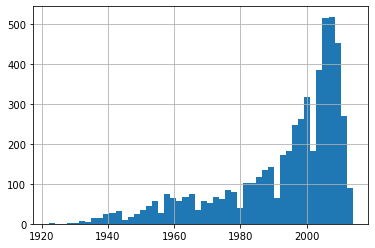

In [246]:
df7['RELEASE_YEAR'].hist(bins=50)


<AxesSubplot:xlabel='RELEASE_YEAR'>

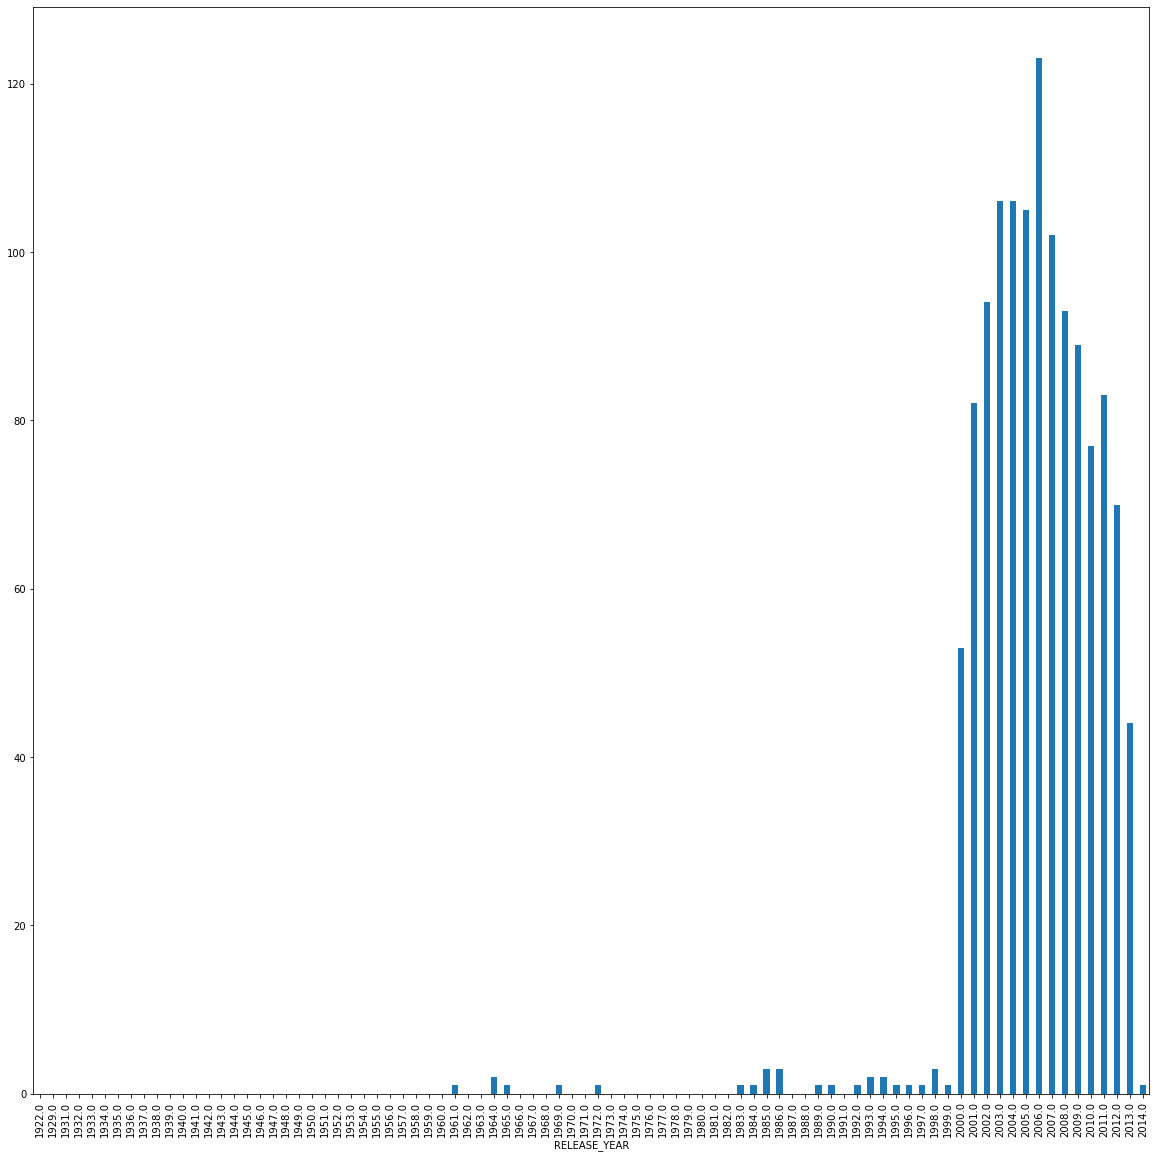

In [247]:
df7.groupby(['RELEASE_YEAR'])['BOX_OFFICE_EARNINGS'].count().plot.bar(figsize=(20,20))


In [248]:
df6['ASSET_ID'].nunique()

412

In [249]:
df5['ASSET_ID'].nunique()

5401

# BULIDING PREDICTIVE MODEL(LINEAR REGRESSION MODEL)

In [250]:
df8=df7[['ASSET_ID','AIRING_REVENUE','Oscar-Wins','BOX_OFFICE_EARNINGS']]

In [251]:
df8

,ASSET_ID,AIRING_REVENUE,Oscar-Wins,BOX_OFFICE_EARNINGS
0,204750,95211.631068,0,"$94,700,000"
1,172902,95211.631068,0,"$18,900,000"
2,198131,95211.631068,0,"$39,700,000"
3,195393,95211.631068,0,"$124,700,000"
4,185444,11579.000000,0,"$30,100,000"
...,...,...,...,...
5396,202141,95211.631068,0,"$61,800"
5397,200915,95211.631068,0,"$59,600"
5398,188021,95211.631068,0,"$2,800"
5399,197147,95211.631068,0,"$31,900"


In [252]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5400
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ASSET_ID                5401 non-null   int64   
 1   RELEASE_YEAR            5401 non-null   float64 
 2   MPAA_RATING             4335 non-null   object  
 3   GENRE                   5374 non-null   object  
 4   IMDB_RATING             5401 non-null   float64 
 5   IMDB_RANKING            5401 non-null   float64 
 6   IMDB_VOTES              5400 non-null   object  
 7   Oscar-Nomination        5401 non-null   int64   
 8   Oscar-Wins              5401 non-null   int64   
 9   Other - Nominations     5401 non-null   int64   
 10  Other - Wins            5401 non-null   int64   
 11  TOMATO_METER            5401 non-null   float64 
 12  TOMATO_RATING           5401 non-null   float64 
 13  TOMATO_REVIEWS          5401 non-null   float64 
 14  TOMATO_FRESH            

In [253]:
df8=df7[['ASSET_ID','AIRING_REVENUE','Oscar-Wins','BOX_OFFICE_EARNINGS']]

In [254]:
df8.corr()

,ASSET_ID,AIRING_REVENUE,Oscar-Wins
ASSET_ID,1.000000,0.007531,-0.028893
AIRING_REVENUE,0.007531,1.000000,0.144911
Oscar-Wins,-0.028893,0.144911,1.000000


In [255]:
airing = pd.DataFrame(df8['AIRING_REVENUE'])
oscar =  pd.DataFrame(df8['Oscar-Wins'])

In [256]:
airing.head()

,AIRING_REVENUE
0,95211.631068
1,95211.631068
2,95211.631068
3,95211.631068
4,11579.000000


In [257]:
#Buld a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(airing,oscar)


In [258]:
model.coef_

array([[5.09313118e-06]])

In [259]:
model.intercept_

array([-0.34902457])

In [260]:
model.score(airing,oscar) #Evaluate the model

0.020999072817202036

In [261]:
#Predict new value of OSCAR
airing_new = pd.DataFrame([11579.00000])
oscar_predict=model.predict(airing_new)
oscar_predict


array([[-0.2900512]])

In [262]:
#Predict more value
X=([95211.631068,11579.000000])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['Airing_new','Oscar_predicted'])
df

,Airing_new,Oscar_predicted
,0,0
0,95211.631068,0.135901
1,11579.000000,-0.290051


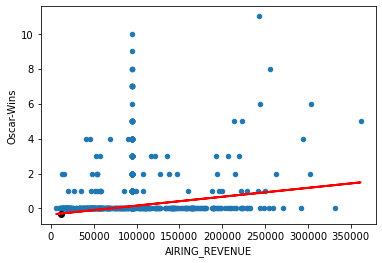

In [263]:
#Visualize the result
df8.plot(kind='scatter',x='AIRING_REVENUE',y='Oscar-Wins')
#Plotting the Regression Line
plt.plot(airing,model.predict(airing),color='red',linewidth=2)
#Plotting the predicted value
plt.scatter(airing_new,oscar_predict,color='black')
#Predict more value
#plt.plot(X , Y, color='blue',linewidth=5)
plt.show()

In [264]:
df7['AIRING_REVENUE']

0       95211.631068
1       95211.631068
2       95211.631068
3       95211.631068
4       11579.000000
            ...     
5396    95211.631068
5397    95211.631068
5398    95211.631068
5399    95211.631068
5400    95211.631068
Name: AIRING_REVENUE, Length: 5401, dtype: float64

In [265]:
df7.corr()

,ASSET_ID,RELEASE_YEAR,IMDB_RATING,IMDB_RANKING,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,TOMATO_METER,TOMATO_RATING,...,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,AIRING_REVENUE,C3_RATING
ASSET_ID,1.000000,0.409479,-0.034911,-0.044720,-0.036425,-0.028893,0.132898,0.059490,-0.059763,-0.054099,...,0.169551,-0.046415,-0.028294,0.018717,0.056198,0.000902,-0.000902,-0.003125,0.007531,0.009275
RELEASE_YEAR,0.409479,1.000000,-0.133090,-0.069917,-0.158923,-0.127550,0.184317,0.121615,-0.213314,-0.198299,...,0.325923,-0.116714,-0.152505,0.041849,0.003176,-0.020408,0.020408,-0.022664,-0.016264,-0.077829
IMDB_RATING,-0.034911,-0.133090,1.000000,0.454030,0.323570,0.250533,0.307525,0.346237,0.618299,0.664086,...,-0.254679,0.777319,0.651730,0.058928,-0.014983,-0.007974,0.007974,0.162718,0.112684,0.073425
IMDB_RANKING,-0.044720,-0.069917,0.454030,1.000000,0.260660,0.209005,0.366382,0.420095,0.675773,0.696413,...,-0.491581,0.414546,0.349747,0.020420,-0.010608,0.005271,-0.005271,0.090636,0.058591,0.031763
Oscar-Nomination,-0.036425,-0.158923,0.323570,0.260660,1.000000,0.626763,0.437092,0.471126,0.275240,0.336192,...,-0.129617,0.303959,0.236786,0.103486,-0.016960,-0.019007,0.019007,0.182098,0.111102,0.047123
Oscar-Wins,-0.028893,-0.127550,0.250533,0.209005,0.626763,1.000000,0.353719,0.469679,0.206938,0.274118,...,-0.099908,0.224248,0.178294,0.139883,-0.030535,-0.018642,0.018642,0.221183,0.144911,0.054016
Other - Nominations,0.132898,0.184317,0.307525,0.366382,0.437092,0.353719,1.000000,0.834272,0.248961,0.314625,...,0.055294,0.278822,0.215876,0.142000,0.013870,-0.013595,0.013595,0.137456,0.102533,0.005917
Other - Wins,0.059490,0.121615,0.346237,0.420095,0.471126,0.469679,0.834272,1.000000,0.295020,0.370950,...,-0.060502,0.312152,0.261631,0.112283,-0.002229,-0.012095,0.012095,0.144819,0.101177,0.008495
TOMATO_METER,-0.059763,-0.213314,0.618299,0.675773,0.275240,0.206938,0.248961,0.295020,1.000000,0.948949,...,-0.529603,0.594232,0.486826,0.016856,-0.018234,-0.000715,0.000715,0.121648,0.071625,0.061856
TOMATO_RATING,-0.054099,-0.198299,0.664086,0.696413,0.336192,0.274118,0.314625,0.370950,0.948949,1.000000,...,-0.463051,0.622941,0.519880,0.029465,-0.014376,-0.001643,0.001643,0.148085,0.081679,0.049017


<AxesSubplot:ylabel='Frequency'>

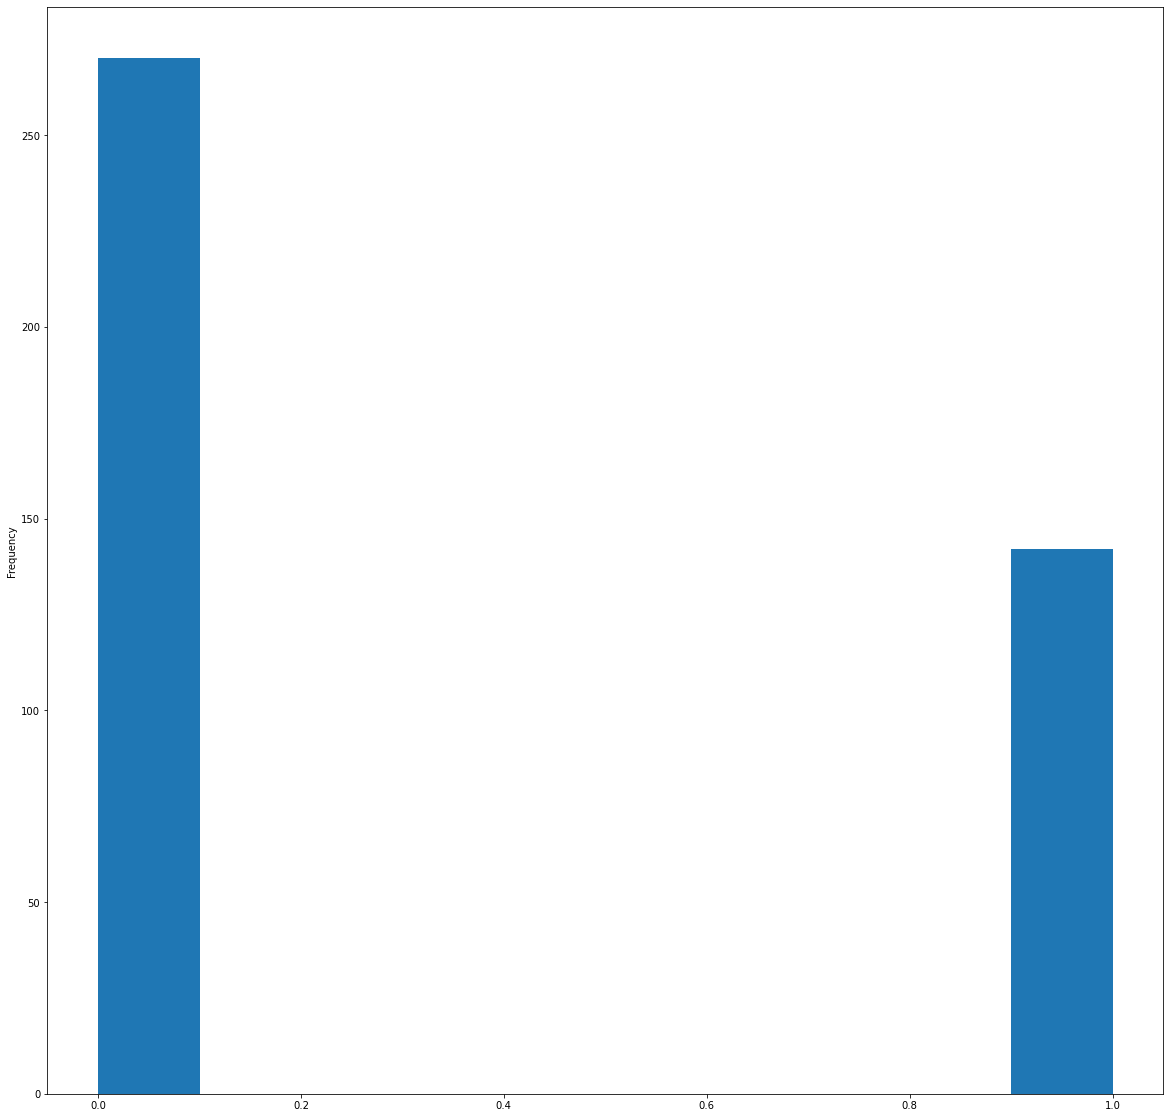

In [266]:
df7.groupby(['AIRING_START_DATE_TIME'])['BOX_OFFICE_EARNINGS'].count().plot.hist(figsize=(20,20))


# PREDCTING C3_RATING WITH AIRING REVENUE

In [267]:
df9=df6[['C3_RATING','AIRING_REVENUE']]

In [268]:
df9['C3_RATING'].fillna((df9['C3_RATING'].mean()),inplace=True)

C:\Users\atul.gupta\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [269]:
c3=pd.DataFrame(df9['C3_RATING'])
airing=pd.DataFrame((df9['AIRING_REVENUE']))

In [270]:
df9.isnull().sum()

C3_RATING         0
AIRING_REVENUE    0
dtype: int64

In [271]:
#Buld a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(airing,c3)

In [272]:
model.coef_

array([[1.94330607]])

In [273]:
model.intercept_

array([207148.48949862])

In [274]:
model.score(airing,c3) #Evaluate the model

0.33148790170164566

In [275]:
#Predicting new value of C3_Rating
airing_new = pd.DataFrame([196093])
c3_predict=model.predict(airing_new)
c3_predict


array([[588217.2058513]])

In [276]:
#Predict more value
X=([249440,308907,73288,33834,294419,39503,42124,56613,171713])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['Airing_new','c3_predicted'])
df

,Airing_new,c3_predicted
,0,0
0,249440,691886.754541
1,308907,807449.336354
2,73288,349569.504446
3,33834,272898.306927
4,294419,779294.718073
5,39503,283914.909014
6,42124,289008.314213
7,56613,317164.875799
8,171713,540839.403968


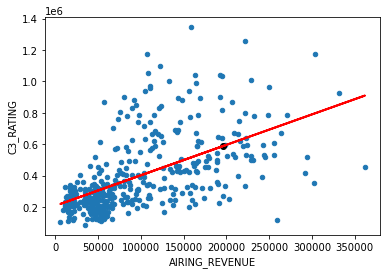

In [277]:
#Visualize the result
df9.plot(kind='scatter',x='AIRING_REVENUE',y='C3_RATING')
#Plotting the Regression Line
plt.plot(airing,model.predict(airing),color='red',linewidth=2)
#Plotting the predicted value
plt.scatter(airing_new,c3_predict,color='black')
#Predict more value
#plt.plot(X , Y, color='blue',linewidth=5)
plt.show()

In [278]:
df9.corr()

,C3_RATING,AIRING_REVENUE
C3_RATING,1.00000,0.57575
AIRING_REVENUE,0.57575,1.00000


In [279]:
df7.isnull().sum()

ASSET_ID                     0
RELEASE_YEAR                 0
MPAA_RATING               1066
GENRE                       27
IMDB_RATING                  0
IMDB_RANKING                 0
IMDB_VOTES                   1
Oscar-Nomination             0
Oscar-Wins                   0
Other - Nominations          0
Other - Wins                 0
TOMATO_METER                 0
TOMATO_RATING                0
TOMATO_REVIEWS               0
TOMATO_FRESH                 0
TOMATO_ROTTEN                0
TOMATO_USER_METER            0
TOMATO_USER_RATINGS          0
TOMATO_USER_REVIEWS          0
TOMATO_IMAGE              1499
BOX_OFFICE_EARNINGS       4145
AIRING_START_DATE_TIME    4989
AIRING_END_DATE_TIME      4989
PREMIER_AIRING               0
EXHIBITION_AIRING            0
FREE_AIRING                  0
SCHEDULED_RUNTIME            0
DAY_PART                  4989
AIRING_REVENUE               0
C3_RATING                    0
_merge                       0
dtype: int64

# DEALING WITH OBJECTIVE OF DATA MODEL SET

In [280]:
df7.nunique()


ASSET_ID                  5401
RELEASE_YEAR                86
MPAA_RATING                 18
GENRE                      517
IMDB_RATING                 72
IMDB_RANKING                93
IMDB_VOTES                4505
Oscar-Nomination            12
Oscar-Wins                  12
Other - Nominations        106
Other - Wins               100
TOMATO_METER               102
TOMATO_RATING               82
TOMATO_REVIEWS             267
TOMATO_FRESH               231
TOMATO_ROTTEN              157
TOMATO_USER_METER           96
TOMATO_USER_RATINGS         38
TOMATO_USER_REVIEWS       4228
TOMATO_IMAGE                 3
BOX_OFFICE_EARNINGS        687
AIRING_START_DATE_TIME     412
AIRING_END_DATE_TIME       412
PREMIER_AIRING               3
EXHIBITION_AIRING            3
FREE_AIRING                  3
SCHEDULED_RUNTIME           26
DAY_PART                     6
AIRING_REVENUE             413
C3_RATING                  412
_merge                       2
dtype: int64

In [281]:
df7['BOX_OFFICE_EARNINGS'] = df7['BOX_OFFICE_EARNINGS'].str.replace(',', '').str.replace('$', '')

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_12628/1875702430.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df7['BOX_OFFICE_EARNINGS'] = df7['BOX_OFFICE_EARNINGS'].str.replace(',', '').str.replace('$', '')


In [282]:
df7['BOX_OFFICE_EARNINGS'].fillna((df7['BOX_OFFICE_EARNINGS'].median()),inplace=True)

In [283]:
df7['BOX_OFFICE_EARNINGS'].astype(int)

0        94700000
1        18900000
2        39700000
3       124700000
4        30100000
          ...    
5396        61800
5397        59600
5398         2800
5399        31900
5400         4600
Name: BOX_OFFICE_EARNINGS, Length: 5401, dtype: int32

<AxesSubplot:ylabel='Frequency'>

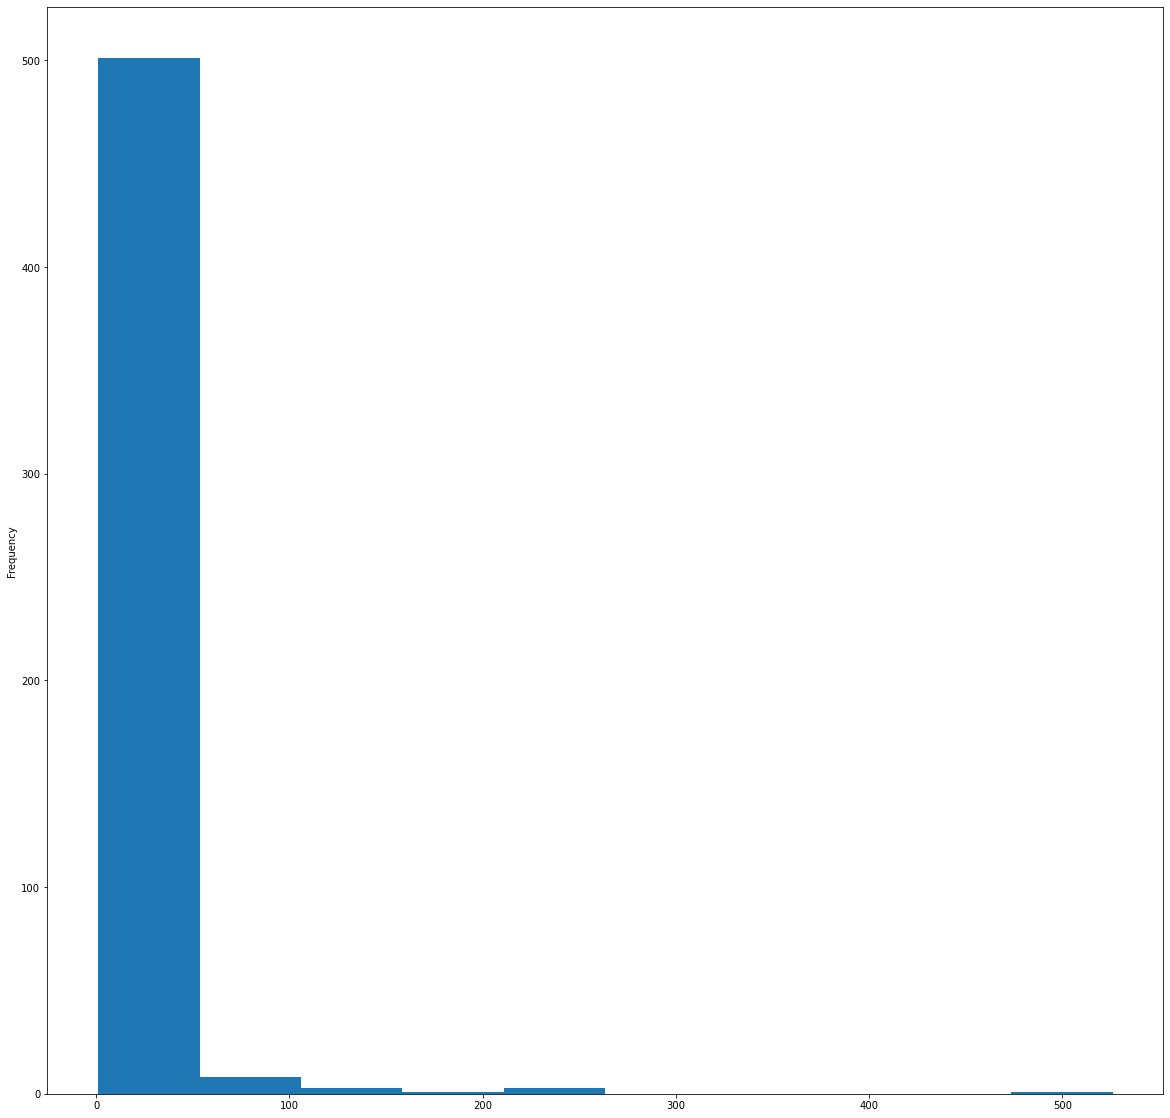

In [284]:
df7.groupby(['GENRE'])['BOX_OFFICE_EARNINGS'].count().plot.hist(figsize=(20,20))


<AxesSubplot:xlabel='RELEASE_YEAR'>

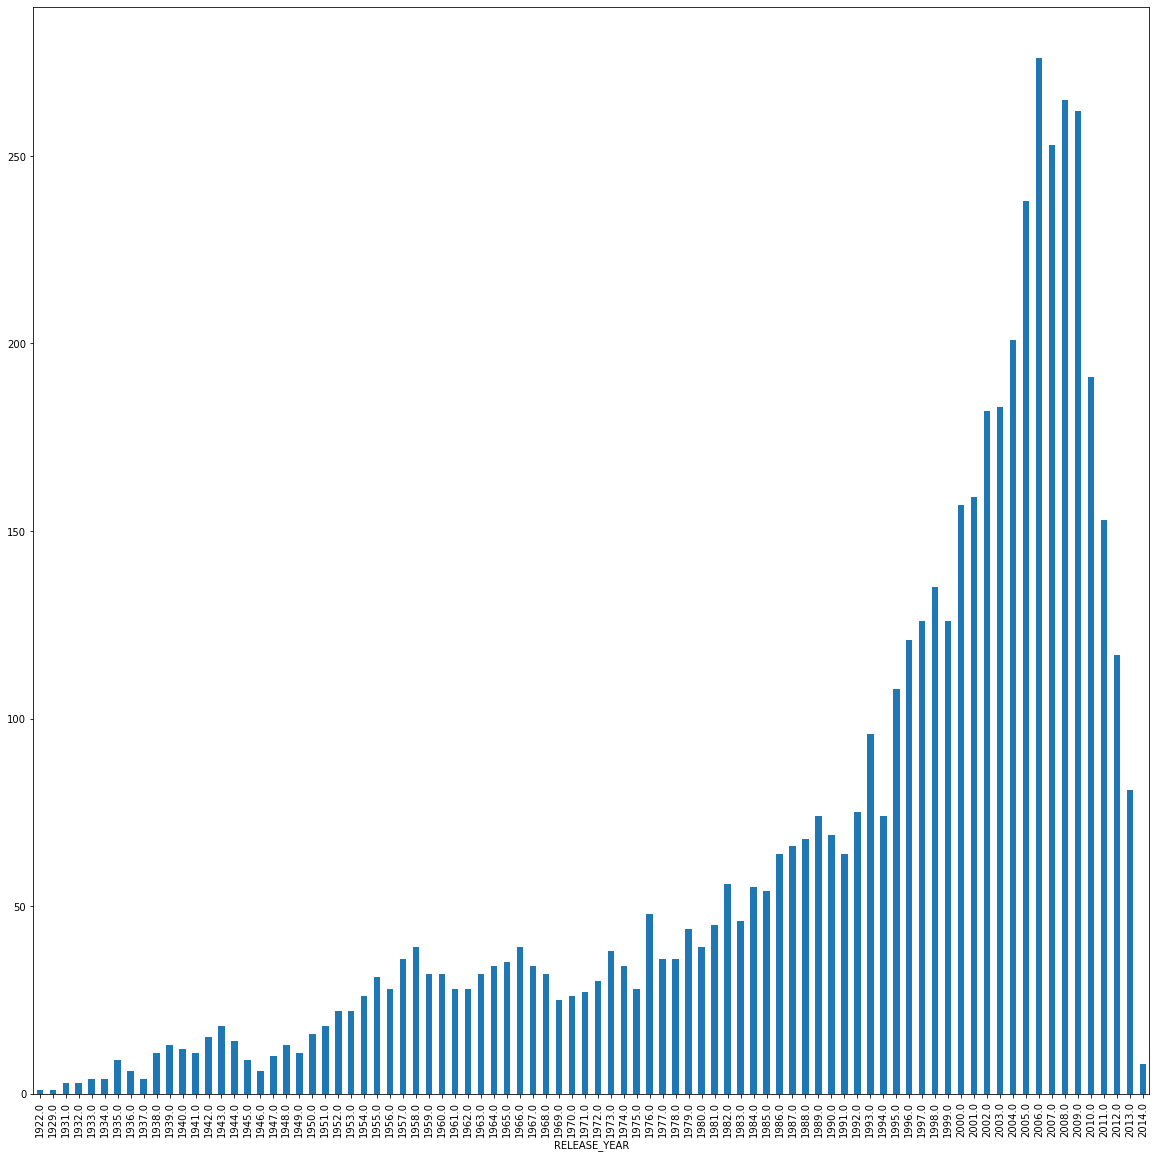

In [285]:
df7.groupby(['RELEASE_YEAR'])['BOX_OFFICE_EARNINGS'].count().plot.bar(figsize=(20,20))


<AxesSubplot:xlabel='AIRING_START_DATE_TIME'>

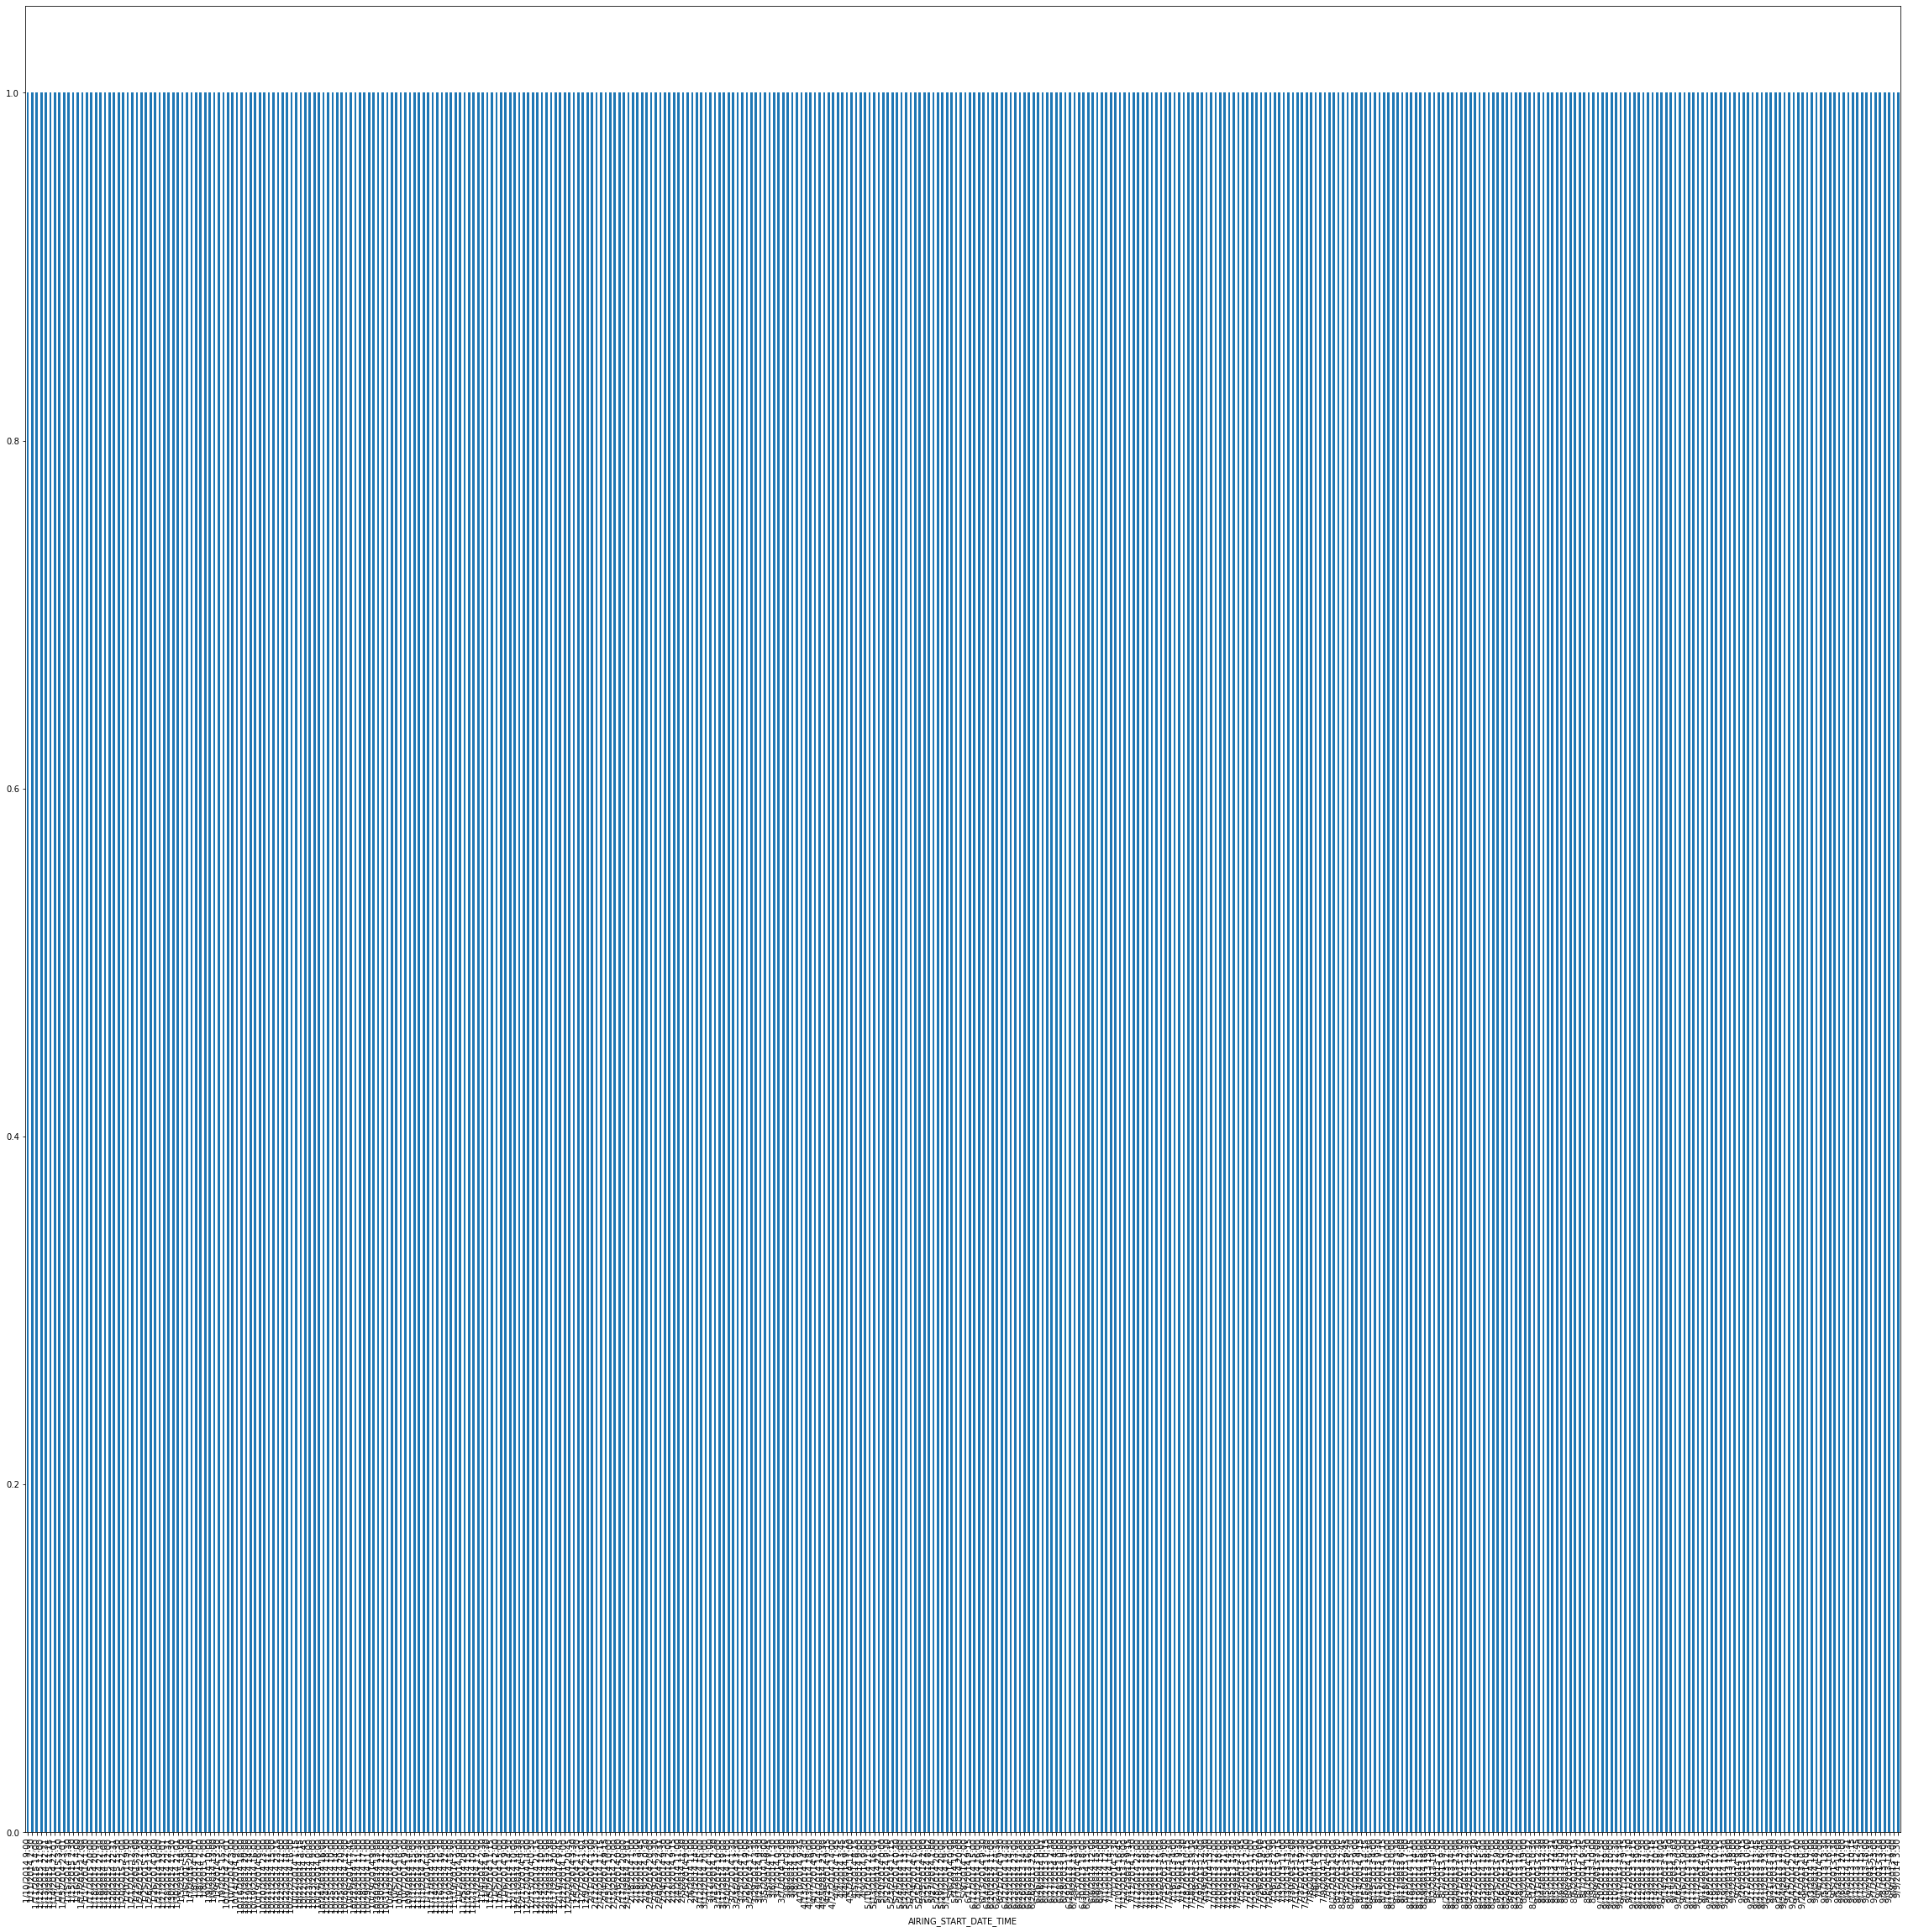

In [286]:
#It can be seen revenue(Box office earning) depend on factor like airing start time(what time mode was shown)
df7.groupby(['AIRING_START_DATE_TIME'])['BOX_OFFICE_EARNINGS'].count().plot.bar(figsize=(40,40))


<AxesSubplot:xlabel='GENRE'>

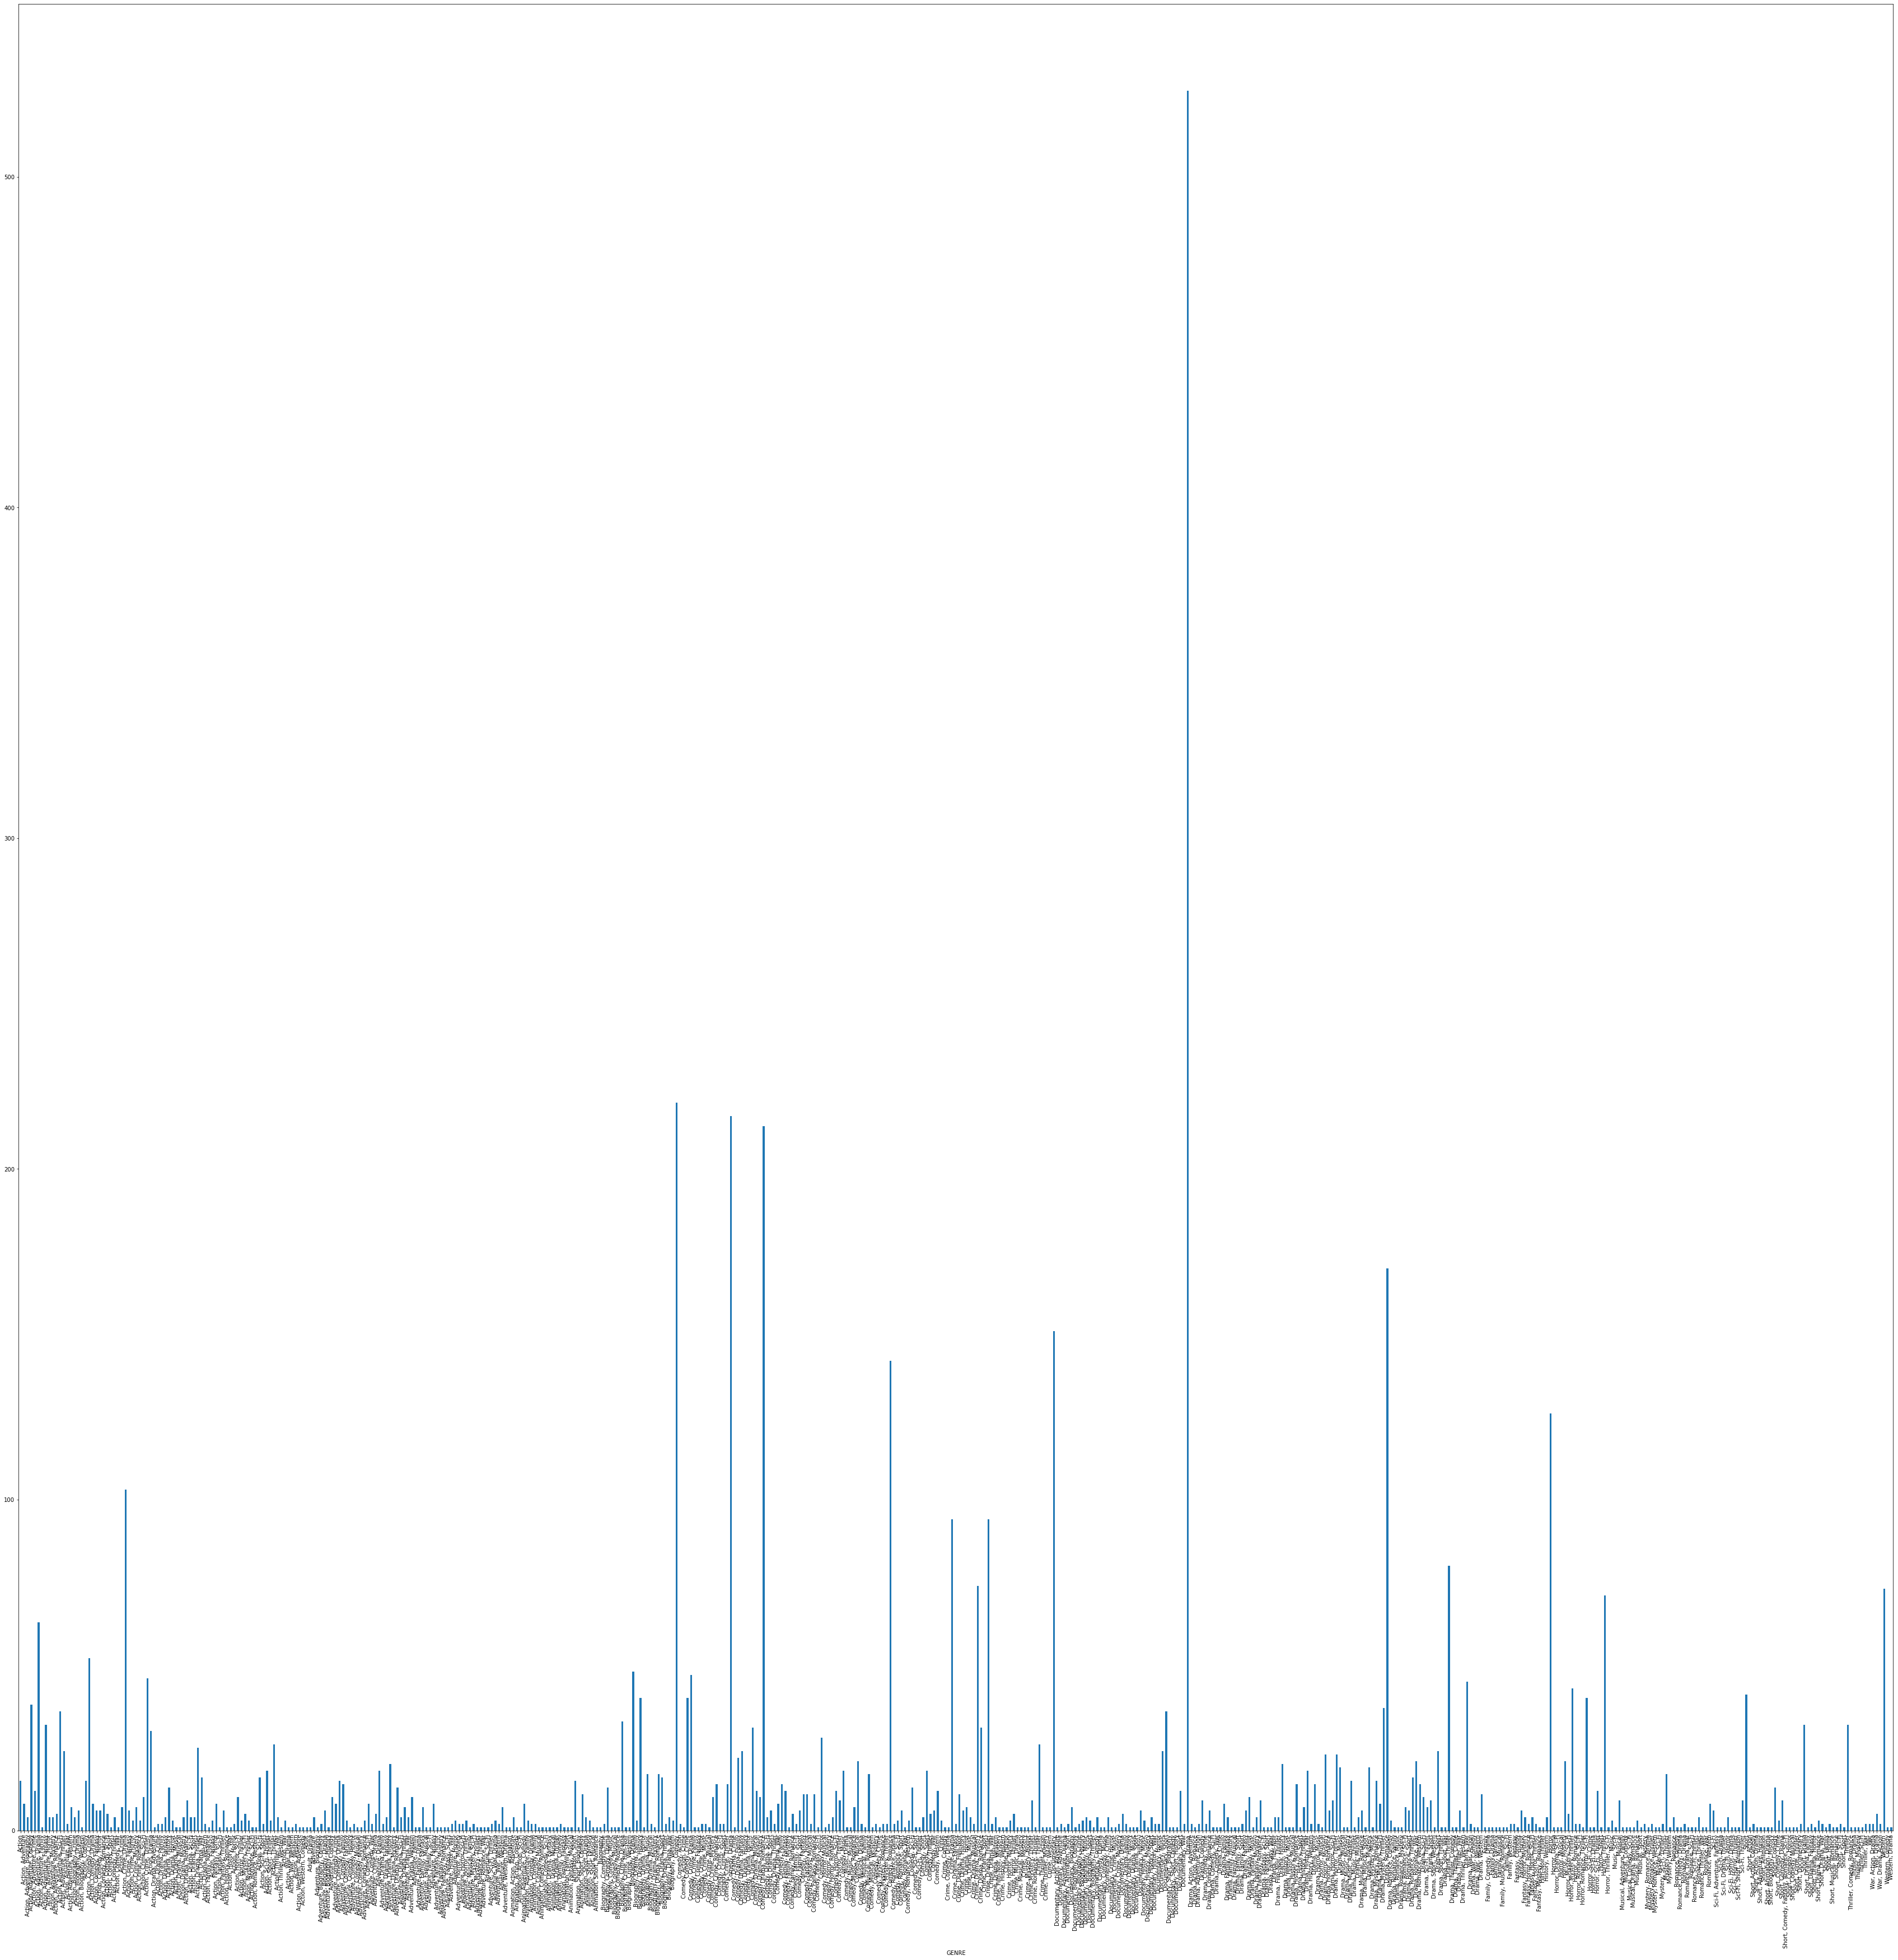

In [300]:
 

df7.groupby(['GENRE'])['BOX_OFFICE_EARNINGS'].count().plot.bar(figsize=(60,60))


In [288]:
#It can be seen that there is no relation between when the movie was shown(Airing time) and genre
df100=df7[['AIRING_START_DATE_TIME','GENRE']]
df100.corr()

""


# PREDICTING BOX OFFICE PREDICTION WITH IMDB RATING

In [289]:
df10=df7[['BOX_OFFICE_EARNINGS','IMDB_RATING']]

In [290]:
df10['IMDB_RATING']=df10['IMDB_RATING'].astype(int)
df10['BOX_OFFICE_EARNINGS']=df10['BOX_OFFICE_EARNINGS'].astype(int)

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_12628/3187346377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['IMDB_RATING']=df10['IMDB_RATING'].astype(int)
C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_12628/3187346377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['BOX_OFFICE_EARNINGS']=df10['BOX_OFFICE_EARNINGS'].astype(int)


In [291]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401 entries, 0 to 5400
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   BOX_OFFICE_EARNINGS  5401 non-null   int32
 1   IMDB_RATING          5401 non-null   int32
dtypes: int32(2)
memory usage: 84.4 KB


In [292]:
box=pd.DataFrame(df10['BOX_OFFICE_EARNINGS'])
imdb=pd.DataFrame(df10['IMDB_RATING'])

In [293]:
#Buld a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(imdb,box)

In [294]:
model.coef_

array([[1250008.92528389]])

In [295]:
model.intercept_

array([13543887.39420326])

In [296]:
model.score(imdb,box) #Evaluate the model

0.0017225133082972022

In [297]:
#Predicting new value of C3_Rating
imdb_new = pd.DataFrame([5.4])
box_predict=model.predict(airing_new)
box_predict


array([[2.45131544e+11]])

In [298]:

#Predict more value
X=([6.2,2.9,2.3,6.8,5.4,7,7.2,6.8,7.6,7.5,8,7.4,6.3,7,7.4,7.2,5.9,6.7,6.5,7.1,7.1,6.1,7,8.6,7.4,6.9,6.9,6.4,5.9,6.6,6.3,6.9,7.6,6.6
,7.4,6.2,5.7,7.6,7.1,7.2,6.2,5.5,8.1,7.5,6.4,6.7,7.2,6.4,6.2,7.3,6.2,6.9,6.8,4.1,7.2,7.2,6.7,7.1,6.2,7.5,5.3,6.3,6.6,7.5,6.6,5.9
,6.2,4.2,5.3,6.4,7.1,6,6.4,6.3,7.9,6.9,6.1,7.6])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['imdb_new','box_predicted'])
df

,imdb_new,box_predicted
,0,0
0,6.2,2.129394e+07
1,2.9,1.716891e+07
2,2.3,1.641891e+07
3,6.8,2.204395e+07
4,5.4,2.029394e+07
...,...,...
73,6.3,2.141894e+07
74,7.9,2.341896e+07
75,6.9,2.216895e+07


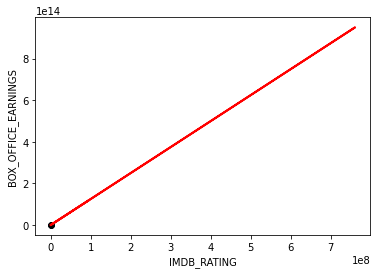

In [299]:
#Visualize the result
df10.plot(kind='scatter',x='IMDB_RATING',y='BOX_OFFICE_EARNINGS')
#Plotting the Regression Line
plt.plot(box,model.predict(box),color='red',linewidth=2)
#Plotting the predicted value
plt.scatter(imdb_new,box_predict,color='black')
#Predict more value
#plt.plot(X , Y, color='blue',linewidth=5)
#plt.show()